In [1]:
# Import the library to mount Google Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Define monkey ID and file paths
monkey_id = "MonkeyN"  # or "MonkeyF"
FOLDERNAME = 'ML_project'
FILENAME = f'{monkey_id}_MUA_responses.csv'  # Automatically picks based on monkey


%cd drive/My\ Drive
%cp -r $FOLDERNAME/$FILENAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV file
csv_path = f"/content/{monkey_id}_MUA_responses.csv"  # Ensure the file is in the correct location
df = pd.read_csv(csv_path)

# Show the first few rows
print("\nFirst 5 Rows of the Data:")
display(df.head())

# Dataset summary
print("\nDataset Information:")
display(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\nTotal Missing Values in Dataset: {missing_values}")


First 5 Rows of the Data:


,Stimulus_Name,Class,Trial_Type,Electrode_1_Region,Electrode_1,Electrode_2_Region,Electrode_2,Electrode_3_Region,Electrode_3,Electrode_4_Region,...,Electrode_1021_Region,Electrode_1021,Electrode_1022_Region,Electrode_1022,Electrode_1023_Region,Electrode_1023,Electrode_1024_Region,Electrode_1024,cr,category_label
0,aardvark/aardvark_01b.jpg,aardvark,train,V1,0.197251,V1,-0.363297,V1,-0.174299,V1,...,IT,0.474470,IT,0.511270,IT,0.598430,IT,-0.170771,0.825000,animal
1,aardvark/aardvark_02s.jpg,aardvark,train,V1,0.098914,V1,-0.334109,V1,-0.174991,V1,...,IT,0.187520,IT,0.194848,IT,0.254685,IT,0.133497,0.800000,animal
2,aardvark/aardvark_03s.jpg,aardvark,train,V1,0.434298,V1,0.020933,V1,-0.221039,V1,...,IT,0.272528,IT,0.742424,IT,0.205106,IT,0.398020,0.878049,animal
3,aardvark/aardvark_04s.jpg,aardvark,train,V1,-0.035596,V1,-0.360433,V1,-0.116870,V1,...,IT,1.373205,IT,1.121719,IT,0.993495,IT,0.239756,0.731707,animal
4,aardvark/aardvark_05s.jpg,aardvark,train,V1,0.469175,V1,0.058533,V1,-0.001665,V1,...,IT,-0.120017,IT,-0.003335,IT,0.590054,IT,-0.065705,0.825000,animal



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22348 entries, 0 to 22347
Columns: 2053 entries, Stimulus_Name to category_label
dtypes: float64(1025), object(1028)
memory usage: 350.0+ MB


None


Total Missing Values in Dataset: 6387


In [3]:
# Extract electrode columns
electrode_cols = [col for col in df.columns if "Electrode_" in col and "Region" not in col]

# Compute mean response across all electrodes for each stimulus
df["Mean_Response_All_Electrodes"] = df[electrode_cols].mean(axis=1)

# Compute mean response per region (V1, V4, IT)
region_means = {}
for region in ["V1", "V4", "IT"]:
    region_cols = [col for col in electrode_cols if df.loc[df.index[0], col.replace("Electrode_", "Electrode_") + "_Region"] == region]
    if region_cols:
        df[f"Mean_Response_{region}"] = df[region_cols].mean(axis=1)
    else:
        df[f"Mean_Response_{region}"] = np.nan  # Assign NaN if no columns exist

# Show the first few rows with computed mean responses
print("\nFirst 5 Rows with Mean Responses per Region:")
display(df[["Stimulus_Name", "Class", "category_label", "Mean_Response_All_Electrodes", "Mean_Response_V1", "Mean_Response_V4", "Mean_Response_IT"]])

# Keep only rows with non-missing category label
df = df[df['category_label'].notna()].reset_index(drop=True)
display(df[["Stimulus_Name", "Class", "category_label", "Mean_Response_All_Electrodes", "Mean_Response_V1", "Mean_Response_V4", "Mean_Response_IT"]])



First 5 Rows with Mean Responses per Region:


,Stimulus_Name,Class,category_label,Mean_Response_All_Electrodes,Mean_Response_V1,Mean_Response_V4,Mean_Response_IT
0,aardvark/aardvark_01b.jpg,aardvark,animal,-0.149905,-0.409440,-0.041298,0.260560
1,aardvark/aardvark_02s.jpg,aardvark,animal,-0.025621,-0.218781,0.048397,0.286680
2,aardvark/aardvark_03s.jpg,aardvark,animal,0.256926,0.119111,0.336028,0.453453
3,aardvark/aardvark_04s.jpg,aardvark,animal,0.098076,-0.220683,0.089439,0.744232
4,aardvark/aardvark_05s.jpg,aardvark,animal,0.149107,0.137091,0.241802,0.080444
...,...,...,...,...,...,...,...
22343,wallpaper/wallpaper_13s.jpg,wallpaper,home decor,-0.154046,-0.187677,-0.094387,-0.146442
22344,wasp/wasp_15n.jpg,wasp,animal,-0.116922,-0.144054,-0.104578,-0.075003
22345,watch/watch_13s.jpg,watch,clothing accessory,0.179471,0.219321,0.097807,0.181435
22346,whip/whip_14s.jpg,whip,weapon,0.043417,0.122365,0.019786,-0.090850


,Stimulus_Name,Class,category_label,Mean_Response_All_Electrodes,Mean_Response_V1,Mean_Response_V4,Mean_Response_IT
0,aardvark/aardvark_01b.jpg,aardvark,animal,-0.149905,-0.409440,-0.041298,0.260560
1,aardvark/aardvark_02s.jpg,aardvark,animal,-0.025621,-0.218781,0.048397,0.286680
2,aardvark/aardvark_03s.jpg,aardvark,animal,0.256926,0.119111,0.336028,0.453453
3,aardvark/aardvark_04s.jpg,aardvark,animal,0.098076,-0.220683,0.089439,0.744232
4,aardvark/aardvark_05s.jpg,aardvark,animal,0.149107,0.137091,0.241802,0.080444
...,...,...,...,...,...,...,...
15957,uniform/uniform_14s.jpg,uniform,clothing,0.108529,0.093563,0.203324,0.043665
15958,wallpaper/wallpaper_13s.jpg,wallpaper,home decor,-0.154046,-0.187677,-0.094387,-0.146442
15959,wasp/wasp_15n.jpg,wasp,animal,-0.116922,-0.144054,-0.104578,-0.075003
15960,watch/watch_13s.jpg,watch,clothing accessory,0.179471,0.219321,0.097807,0.181435


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15962.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15961.
  res = hypotest_fun_out(*samples, **kwds)



Normality Test Results:
                         Metric  Shapiro-Wilk W  Shapiro p-value  \
0  Mean_Response_All_Electrodes        0.990122     1.419592e-31   
1       Memorability Score (cr)        0.984914     1.075861e-37   

   KS Statistic    KS p-value  
0      0.035610  5.064140e-18  
1      0.050119  2.774631e-35  


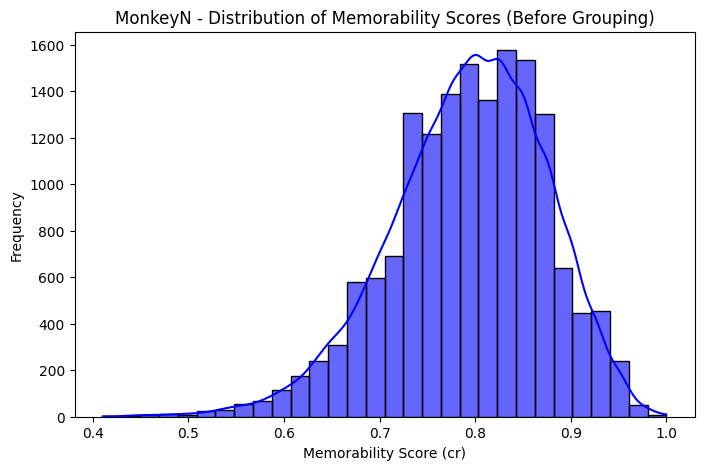

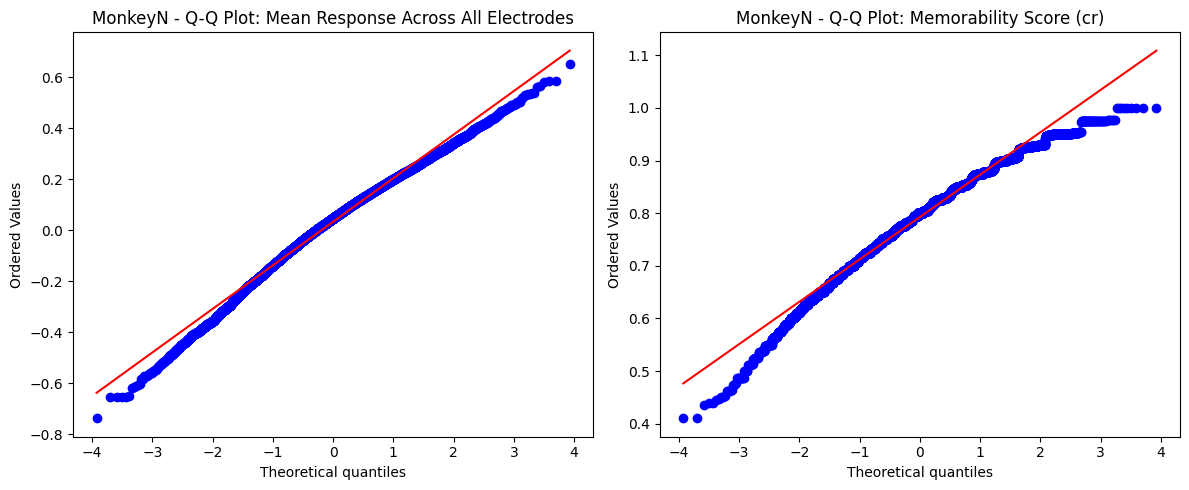

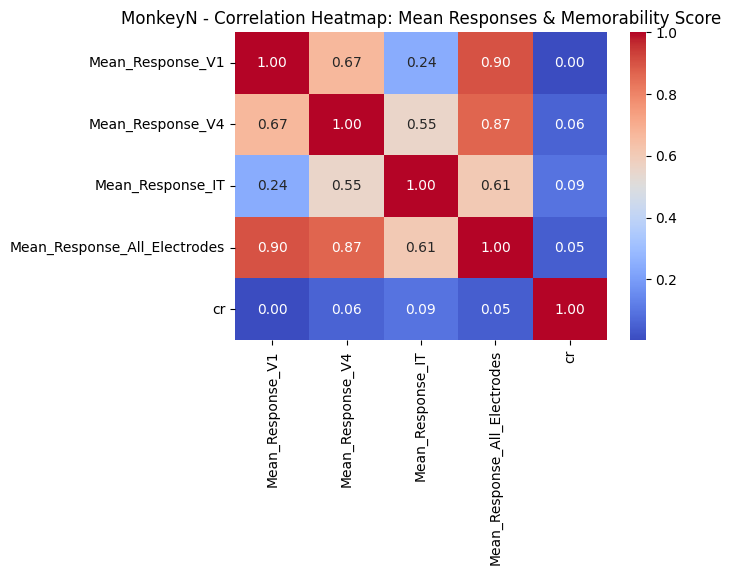

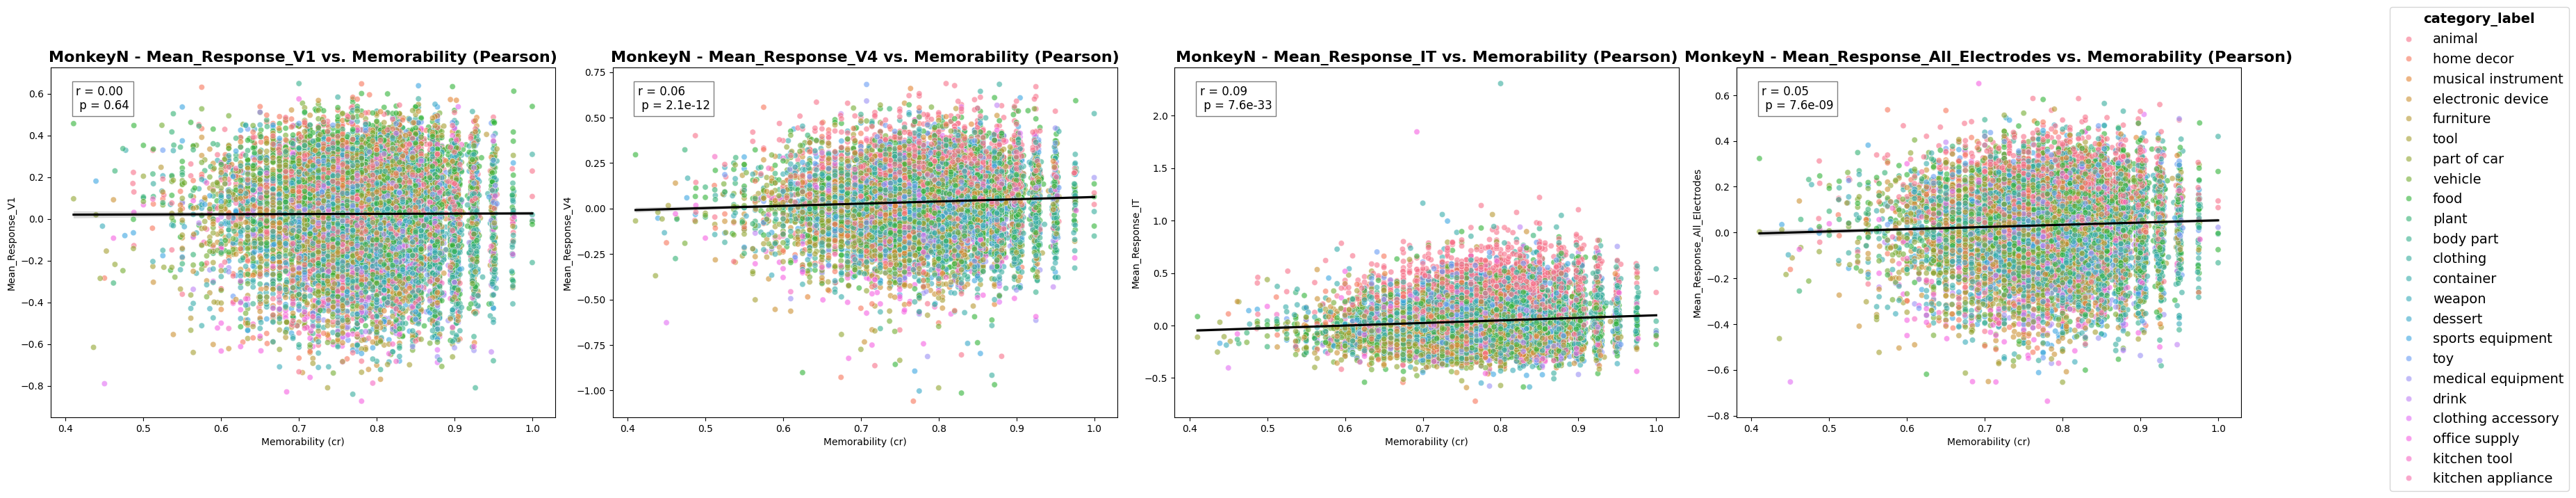

In [4]:
from scipy.stats import pearsonr, spearmanr, shapiro, kstest, norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Perform Shapiro-Wilk test for normality (Note: Not reliable for N > 5000)
shapiro_response = shapiro(df["Mean_Response_All_Electrodes"].dropna())
shapiro_memorability = shapiro(df["cr"].dropna())

# Perform Kolmogorov-Smirnov test for normality
ks_response = kstest(df["Mean_Response_All_Electrodes"].dropna(), 'norm', args=(df["Mean_Response_All_Electrodes"].mean(), df["Mean_Response_All_Electrodes"].std()))
ks_memorability = kstest(df["cr"].dropna(), 'norm', args=(df["cr"].mean(), df["cr"].std()))

# Print normality test results
normality_results = pd.DataFrame({
    "Metric": ["Mean_Response_All_Electrodes", "Memorability Score (cr)"],
    "Shapiro-Wilk W": [shapiro_response.statistic, shapiro_memorability.statistic],
    "Shapiro p-value": [shapiro_response.pvalue, shapiro_memorability.pvalue],
    "KS Statistic": [ks_response.statistic, ks_memorability.statistic],
    "KS p-value": [ks_response.pvalue, ks_memorability.pvalue]
})

print("\nNormality Test Results:")
print(normality_results)

# Plot distribution of Memorability Score (before grouping)
plt.figure(figsize=(8, 5))
sns.histplot(df["cr"], bins=30, kde=True, color="blue", alpha=0.6)
plt.title(f"{monkey_id} - Distribution of Memorability Scores (Before Grouping)")
plt.xlabel("Memorability Score (cr)")
plt.ylabel("Frequency")
plt.show()

# Plot Q-Q plots to visualize normality
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q Plot for Mean Response
stats.probplot(df["Mean_Response_All_Electrodes"].dropna(), dist="norm", plot=axes[0])
axes[0].set_title(f"{monkey_id} - Q-Q Plot: Mean Response Across All Electrodes")

# Q-Q Plot for Memorability Score
stats.probplot(df["cr"].dropna(), dist="norm", plot=axes[1])
axes[1].set_title(f"{monkey_id} - Q-Q Plot: Memorability Score (cr)")

plt.tight_layout()
plt.show()

# Pearson and Spearman correlation
valid_data_all = df[["Mean_Response_All_Electrodes", "cr"]].dropna()
pearson_r_all, pearson_p_all = pearsonr(valid_data_all["Mean_Response_All_Electrodes"], valid_data_all["cr"])

# Correlation matrix including all electrodes mean response
correlation_matrix = df[["Mean_Response_V1", "Mean_Response_V4", "Mean_Response_IT", "Mean_Response_All_Electrodes", "cr"]].corr()

# Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"{monkey_id} - Correlation Heatmap: Mean Responses & Memorability Score")
plt.show()

# Scatterplots: Memorability Score vs Mean Responses (Pearson only), X=cr, Y=response
fig, axes = plt.subplots(1, 4, figsize=(34, 6))
regions = ["Mean_Response_V1", "Mean_Response_V4", "Mean_Response_IT", "Mean_Response_All_Electrodes"]

for i, region in enumerate(regions):
    valid_data = df[[region, "cr", "category_label"]].dropna()
    pearson_r, pearson_p = pearsonr(valid_data["cr"], valid_data[region])
    ax = axes[i]

    # Only enable legend on the last plot to extract it
    show_legend = (i == len(regions) - 1)
    scatter = sns.scatterplot(data=valid_data, x="cr", y=region, hue="category_label",
                              ax=ax, alpha=0.6, legend=show_legend)
    sns.regplot(data=valid_data, x="cr", y=region, scatter=False, color="black", ax=ax)

    # Remove legend from subplot after getting handles
    if show_legend:
        handles, labels = scatter.get_legend_handles_labels()
        ax.legend_.remove()

    ax.text(0.05, 0.95, f"r = {pearson_r:.2f}\n p = {pearson_p:.2g}",
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title(f"{monkey_id} - {region} vs. Memorability (Pearson)", fontsize=16, fontweight='bold')
    ax.set_xlabel("Memorability (cr)")
    ax.set_ylabel(region)

# Add only one global legend
fig.legend(handles, labels, title="category_label",
           title_fontproperties={'weight': 'bold', 'size': 14},
           bbox_to_anchor=(1.01, 0.5), loc='center left', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(right=0.95)
plt.show()



# Pearson correlation
**V1 (Left Plot)**

Pearson r = 0.01, p = 0.24
Interpretation: No significant correlation between V1 activity and memorability.
Conclusion: V1 activity does not predict image memorability.

**V4 (Middle Plot)**

Pearson r = 0.07, p = 4.4e-23
Interpretation: A very weak positive correlation, but highly statistically significant.
Conclusion: V4 activity may contribute slightly to memorability, but the effect size is small.

**IT (Right Plot)**

Pearson r = 0.10, p = 1.6e-50
Interpretation: A weak positive correlation, highly significant.
Conclusion: IT responses show the strongest correlation, which is expected since IT is involved in object recognition and memory-related processing

**Memorabilty Score Distribution**
1. *Skewness*: The distribution is slightly skewed towards higher memorability scores (centered around ~0.8), meaning most images have relatively high memorability.
2. *Range*: The scores range approximately between 0.4 and 1.0.
3. *Peak*: The most common scores are in the range of 0.75–0.85, indicating that a majority of images have moderate to high memorability.
4. *Density Curve*: The KDE (Kernel Density Estimation) curve overlays the histogram, showing the smooth distribution trend.

# Distribution of Memorability Scores Across Categories

<ipython-input-5-a963d6290722>:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




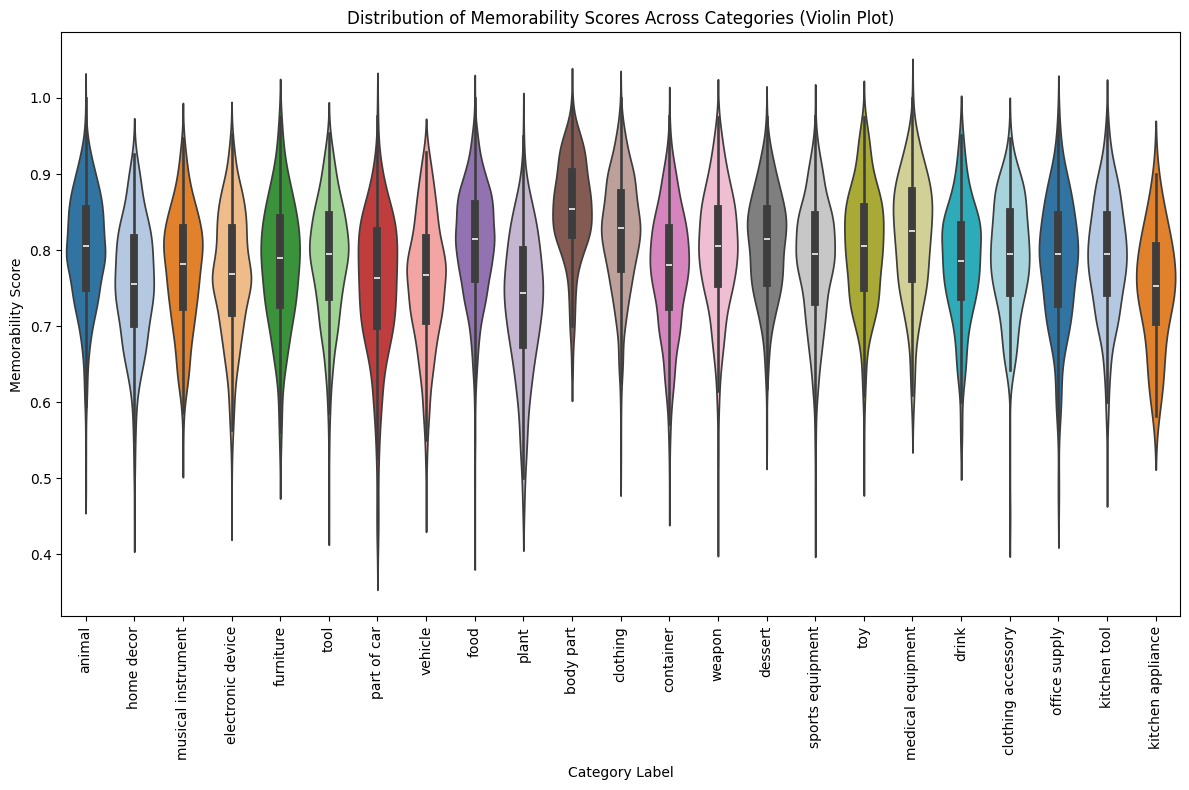

In [5]:
import plotly.express as px
import pandas as pd

# Compute mean memorability per category for hover info
category_means = df.groupby("category_label")["cr"].mean().round(2).reset_index()
category_means = category_means.rename(columns={"cr": "mean_memorability"})

# Merge means back into the main dataframe for hover info
df_with_hover = df.merge(category_means, on="category_label", how="left")

# Sort categories by mean memorability for nicer x-axis order
sorted_categories = category_means.sort_values("mean_memorability", ascending=False)["category_label"]

# Create interactive boxplot
fig = px.box(df_with_hover,
             x="category_label",
             y="cr",
             color="category_label",
             hover_data={
                 "category_label": True,
                 "mean_memorability": True,
                 "cr": False  # Hide because it's already the y-axis
             },
             category_orders={"category_label": sorted_categories},
             points="all",
             title="Distribution of Memorability Scores Across Categories",
             labels={"cr": "Memorability Score", "category_label": "Category"})

# Rotate x-axis labels and tidy layout
fig.update_layout(
    xaxis_tickangle=-40,
    showlegend=False,
    height=600,
    width=1300,
    margin=dict(t=80, b=160),
    title=dict(x=0.5, font=dict(size=20))
)

fig.show()


# Create a violin plot to visualize the distribution of memorability scores across categories
plt.figure(figsize=(12, 8))
sns.violinplot(x='category_label', y='cr', data=df, palette='tab20')
plt.xticks(rotation=90)  # Rotate the category labels for better readability
plt.title('Distribution of Memorability Scores Across Categories (Violin Plot)')
plt.xlabel('Category Label')
plt.ylabel('Memorability Score')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import math

# Define ROI columns and category groups
roi_columns = ["Mean_Response_V1", "Mean_Response_V4", "Mean_Response_IT"]

category_groups = {
    "Living Things": ["animal", "plant", "body part"],
    "Food Related": ["food", "dessert", "drink"],
    "Tools & Equipment": ["tool", "kitchen tool", "sports equipment", "medical equipment"],
    "Vehicles & Devices": ["vehicle", "electronic device", "part of car"],
    "Home & Office Items": ["home decor", "furniture", "office supply", "kitchen appliance"]
}

category2_groups = {
    "Body Parts Shown": ["body part"],
    "Faces Shown": ["animal", "body part", ],  # Possible categories with faces
    "Objects Shown": [
        "clothing", "clothing accessory", "container", "dessert", "drink", "electronic device",
        "food", "furniture", "home decor", "kitchen tool", "medical equipment", "office supply",
        "part of car", "sports equipment", "tool", "vehicle", "weapon"
    ]
}


# Function to generate grouped plots
def plot_groupwise_mua_correlations(df, category_groups, roi_columns, group_type="MUA Responses"):
    df = df.dropna(subset=['category_label', 'cr'])

    for group_name, categories in category_groups.items():
        filtered_df = df[df["category_label"].isin(categories)]
        if filtered_df.empty:
            print(f"Skipping {group_name}: No data available.")
            continue

        # Determine subplot grid
        n_rois = len(roi_columns)
        n_cols = 3
        n_rows = math.ceil(n_rois / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
        axes = axes.flatten()

        # Unique color per category
        unique_cats = sorted(filtered_df["category_label"].unique())
        palette = sns.color_palette("tab10", len(unique_cats))
        color_map = dict(zip(unique_cats, palette))

        # Create dummy plot to extract legend
        tmp_ax = fig.add_subplot(111)
        tmp_plot = sns.scatterplot(
            data=filtered_df, x="cr", y=roi_columns[0],
            hue="category_label", palette=color_map, ax=tmp_ax, alpha=0.7
        )
        handles, labels = tmp_ax.get_legend_handles_labels()
        tmp_ax.remove()

        for i, roi in enumerate(roi_columns):
            if i >= len(axes):
                break

            corr, p = pearsonr(filtered_df['cr'], filtered_df[roi])
            p_text = f'p = {p:.3f}' if p <= 0.05 else 'p > 0.05'

            sns.scatterplot(data=filtered_df, x="cr", y=roi,
                            hue="category_label", palette=color_map,
                            ax=axes[i], alpha=0.7, legend=False)

            sns.regplot(data=filtered_df, x="cr", y=roi,
                        scatter=False, color='black', ax=axes[i])

            axes[i].set_title(f'{roi}\nr = {corr:.2f}, {p_text}', fontsize=10, fontweight='bold')
            axes[i].set_xlabel("Memorability Score (cr)")
            axes[i].set_ylabel("Mean MUA Response")

        # Remove empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Add shared legend
        fig.legend(handles, labels, title="Categories",
                   bbox_to_anchor=(1.02, 0.5), loc="center left", frameon=True)

        plt.suptitle(f'{monkey_id} : {group_type} - ROI Correlations: {group_name}', fontsize=16, fontweight='bold')
        plt.tight_layout(rect=[0, 0, 0.98, 0.98])
        plt.show()

plot_groupwise_mua_correlations(df.copy(), category_groups, roi_columns, group_type="MUA")

plot_groupwise_mua_correlations(df.copy(), category2_groups, roi_columns, group_type="MUA")




Output hidden; open in https://colab.research.google.com to view.

# trying Linear Regression

 assuming not binning memorability

Pearson's r is very low (≈ 0.06–0.09) → suggests that a linear model might explain very little variance.

The relationship might be nonlinear or more complex (e.g., only some ROIs or certain patterns matter).

trying Linear Regression first just to establish a baseline.
See how much variance is explained (R² score will be low if the correlation is weak).

V1: 15961 samples, 512 electrodes
V4: 15961 samples, 192 electrodes
IT: 15961 samples, 320 electrodes

Running baseline Linear Regression for V1...
R² Score:       -0.018
MAE:            0.065
RMSE:           0.082


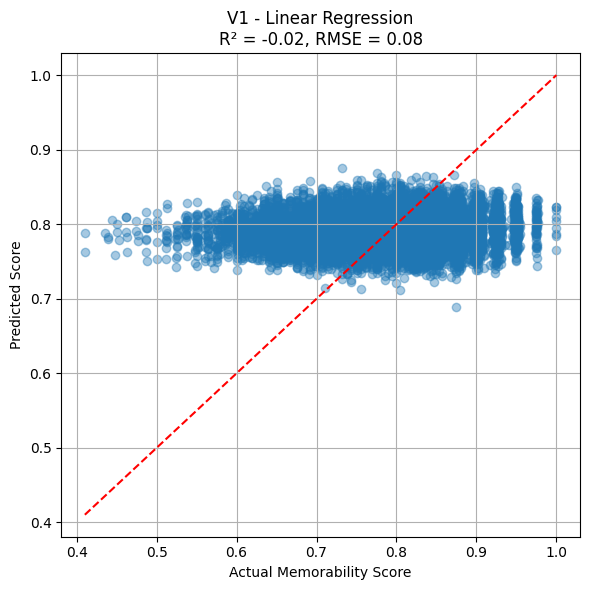


Running baseline Linear Regression for V4...
R² Score:       0.016
MAE:            0.064
RMSE:           0.080


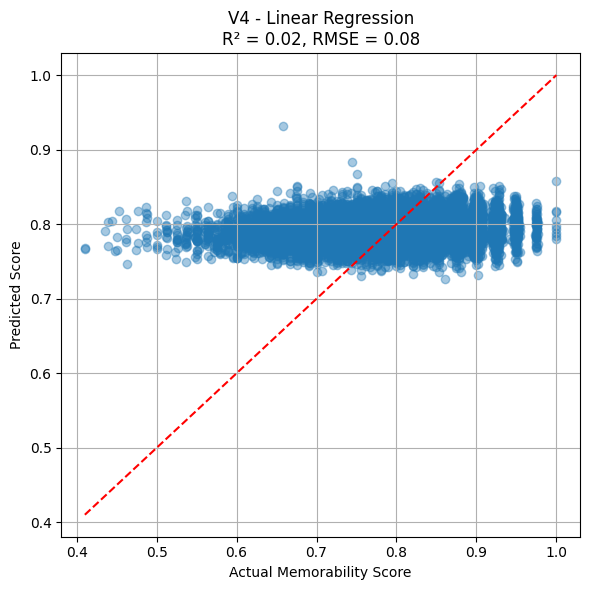


Running baseline Linear Regression for IT...
R² Score:       0.027
MAE:            0.063
RMSE:           0.080


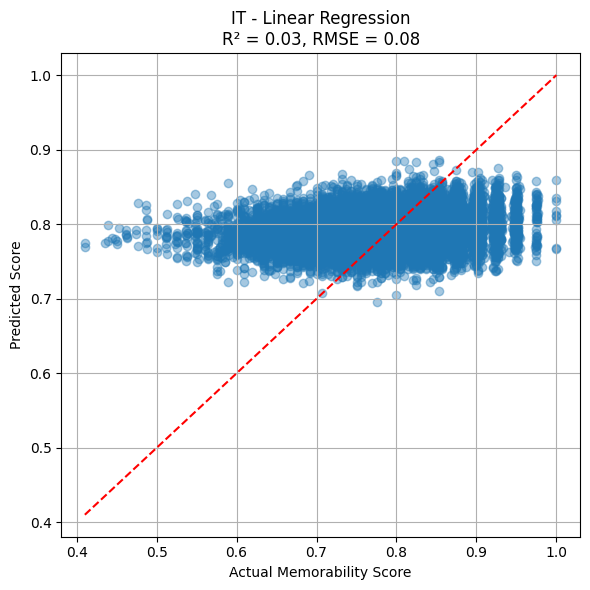

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Function to run baseline linear regression with cross-validation
def run_baseline_regression(X, y, roi_name="ROI", n_splits=5):
    print(f"\nRunning baseline Linear Regression for {roi_name}...")

    # Create a pipeline: standardize features → apply linear regression
    model = make_pipeline(StandardScaler(), LinearRegression())

    # Create a K-Fold cross-validation object (splits data to 5 parts by default)
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Get cross-validated predictions (on test folds, not training!)
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # Compute evaluation metrics
    r2 = r2_score(y, y_pred)                            # R-squared: proportion of variance explained
    mae = mean_absolute_error(y, y_pred)                # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y, y_pred))       # Root Mean Squared Error

    # Print the metrics
    print(f"R² Score:       {r2:.3f}")
    print(f"MAE:            {mae:.3f}")
    print(f"RMSE:           {rmse:.3f}")

    # Plot predicted vs. actual memorability scores
    plt.figure(figsize=(6, 6))
    plt.scatter(y, y_pred, alpha=0.4)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Identity line for perfect prediction
    plt.xlabel("Actual Memorability Score")
    plt.ylabel("Predicted Score")
    plt.title(f"{roi_name} - Linear Regression\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ===============================
# PREPARE ROI DATA FOR REGRESSION
# ===============================

# Define the list of brain regions of interest (ROIs)
roi_names = ["V1", "V4", "IT"]

# Create a dictionary of electrode columns associated with each ROI
roi_columns = {
    roi: [col for col in df.columns if col.startswith("Electrode_") and not col.endswith("_Region")
          and df.loc[0, col + "_Region"] == roi]  # Check region assignment from "_Region" column
    for roi in roi_names
}

# Initialize dictionary to hold input (X) and target (y) data for each ROI
roi_data = {}

# For each ROI, extract relevant electrode data and memorability scores
for roi, cols in roi_columns.items():
    # Remove any rows with missing values in electrode responses or memorability score
    roi_df = df.dropna(subset=cols + ['cr'])

    # X = matrix of brain responses from all electrodes in this ROI
    X = roi_df[cols].values

    # y = memorability scores (continuous)
    y = roi_df['cr'].values

    # Save to dictionary
    roi_data[roi] = {'X': X, 'y': y}  # So each row in X is one stimulus, and each column is one electrode's response.
                                      # Y The corresponding memorability score (cr) of the image shown during that stimulus.



    print(f"{roi}: {X.shape[0]} samples, {X.shape[1]} electrodes")


# ===============================
# RUN REGRESSION FOR EACH ROI
# ===============================

# Run baseline regression model separately for each ROI
run_baseline_regression(roi_data["V1"]["X"], roi_data["V1"]["y"], roi_name="V1")
run_baseline_regression(roi_data["V4"]["X"], roi_data["V4"]["y"], roi_name="V4")
run_baseline_regression(roi_data["IT"]["X"], roi_data["IT"]["y"], roi_name="IT")


# after balancing data


Running balanced Linear Regression for V1...
Balanced sample size: 969 samples (323 per bin), 512 electrodes
R² Score: -2.018
MAE:      0.181
RMSE:     0.224


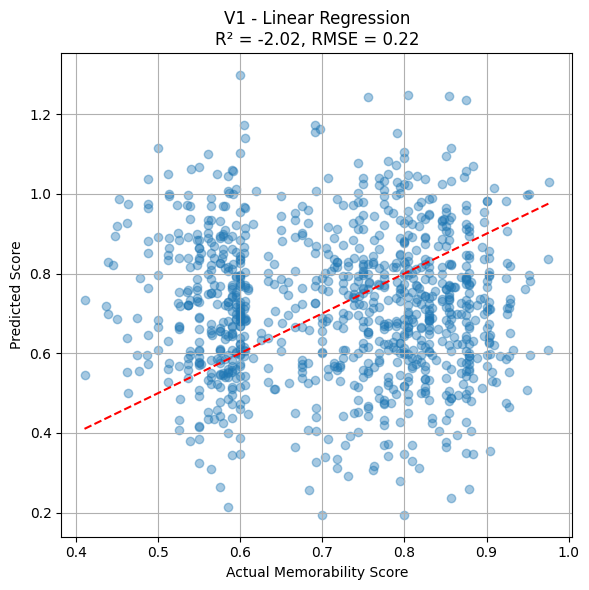


Running balanced Linear Regression for V4...
Balanced sample size: 969 samples (323 per bin), 192 electrodes
R² Score: -0.337
MAE:      0.124
RMSE:     0.149


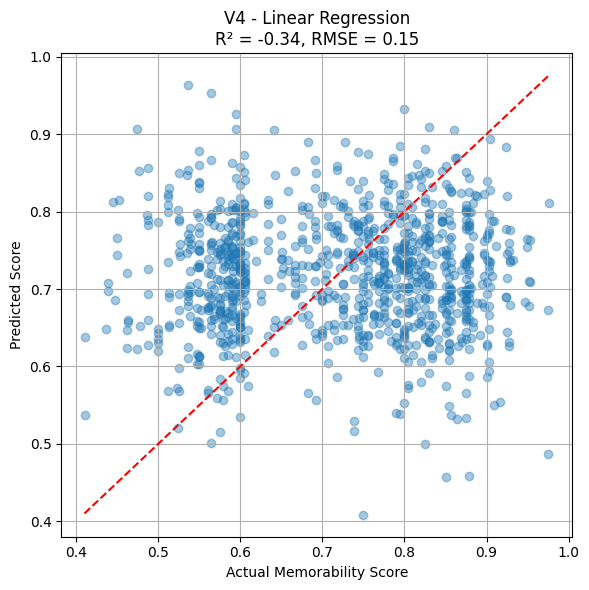


Running balanced Linear Regression for IT...
Balanced sample size: 969 samples (323 per bin), 320 electrodes
R² Score: -0.624
MAE:      0.132
RMSE:     0.164


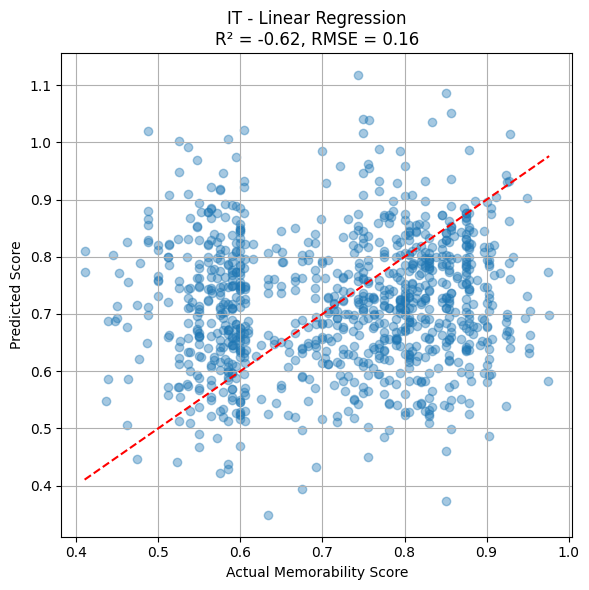

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def run_balanced_regression(df, roi_cols, roi_name="ROI", n_bins=3, n_splits=5):
    print(f"\nRunning balanced Linear Regression for {roi_name}...")

    # Drop rows with missing values in the selected ROI columns or 'cr'
    df_clean = df.dropna(subset=roi_cols + ['cr']).copy()

    # Create bins from cr (memorability score)
    df_clean['cr_bin'] = pd.cut(df_clean['cr'], bins=n_bins, labels=False)

    # Find the smallest group size among bins
    min_count = df_clean['cr_bin'].value_counts().min()

    # Subsample to equal number of samples per bin
    balanced_df = df_clean.groupby('cr_bin', group_keys=False).sample(n=min_count, random_state=42)

    # Prepare inputs and targets
    X = balanced_df[roi_cols].values
    y = balanced_df['cr'].values

    print(f"Balanced sample size: {X.shape[0]} samples ({min_count} per bin), {X.shape[1]} electrodes")

    # pipeline: standardization + linear regression
    model = make_pipeline(StandardScaler(), LinearRegression())

    # Cross-validation
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # Metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"R² Score: {r2:.3f}")
    print(f"MAE:      {mae:.3f}")
    print(f"RMSE:     {rmse:.3f}")

    # Plot: Predicted vs Actual
    plt.figure(figsize=(6, 6))
    plt.scatter(y, y_pred, alpha=0.4)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Memorability Score")
    plt.ylabel("Predicted Score")
    plt.title(f"{roi_name} - Linear Regression\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- Run for each ROI ---

# Set ROI names and extract columns
roi_names = ["V1", "V4", "IT"]
roi_columns = {
    roi: [col for col in df.columns if col.startswith("Electrode_") and not col.endswith("_Region")
          and df.loc[0, col + "_Region"] == roi]
    for roi in roi_names
}

# Run model for each ROI
for roi in roi_names:
    run_balanced_regression(df, roi_columns[roi], roi_name=roi, n_bins=3)
